# Final Project: Build a Regression Model in Keras

The objective of this project is to build a regression model using the Keras library to model data about concrete compressive strength. Based on inputs related to composition (Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate) and time (Age), we will create a model that can predict the concrete's compressive strength.

## Part C: Increase number of epochs

Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

### Download and Clean Dataset

We'll start by importing the <em>pandas</em> and the Numpy libraries.

In [1]:
import pandas as pd
import numpy as np

Then we'll download and read the file.

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


We'll check the dataset for any missing values.

In [3]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### Split data into predictors and target
Then we'll separate the inputs from the output. The target variable in this problem is the concrete compressive strength. Our predictors are all the other columns.

In [5]:
X = concrete_data.iloc[:, :-1]  # Predictors
y = concrete_data.iloc[:, -1]   # Target

We'll double check the predictors and the target dataframes.

In [6]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, we'll save the number of predictors to a variable called n_cols so we can use it when building our model.

In [8]:
n_cols = X.shape[1] # number of predictors

### Build a Neural Network
First we'll import Keras and the packages we need to build our regression model.

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Now, we'll define a function that defines our regression model for us so that we can call it to create our model.

In [10]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

This function creates a model that has one hidden layer of 10 nodes that uses a ReLU activation function. The it uses the adam optimizer and the mean squared error as the loss function.

### Train and Test the Network

#### Instructions for Part C
Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

First, we'll import what we'll need from Scikit-learn.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


Then, we'll create a list of mean squared errors where we can save the values of the mean squared errors after each loop run so that we can calculate the mean and standard deviation of these.

In [12]:
mse_list = []

Now, we'll create a loop that allows us to cycle through this process 50 times. We will leave out 30% of the data for validation and we will train the model for 100 epochs. 

In [13]:
for i in range(50): #cycle through 5 times
    # Split data into trainng and testing data. Use a fixed random state to ensure reproducibility.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Normalize the data
    X_train_normalized = (X_train - X_train.mean()) / X_train.std()
    X_test_normalized = (X_test - X_test.mean()) / X_test.std()
    
    # Print so humans can track which cycle the loop is on. Added 1 because most humans don't count starting at 0.
    print(f"Cycle:{i + 1}")
    
    # Call model
    model = regression_model()
    
    # Fit the model, this time using 100 epochs instead of 50
    model.fit(X_train_normalized, y_train, validation_data=(X_test_normalized, y_test), epochs=100, verbose=2)
    
    # Evaluate model
    y_pred = model.predict(X_test_normalized)
    
    # Save mean-square error to list
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    
    

#share mean squared error and standard deviation
mean_mse = np.mean(mse_list)
std_mse = np.std(mse_list)

Cycle:1






Train on 721 samples, validate on 309 samples
Epoch 1/100


2024-08-12 18:00:07.586016: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2024-08-12 18:00:07.591298: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394300000 Hz
2024-08-12 18:00:07.591846: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x563ee87ff490 executing computations on platform Host. Devices:
2024-08-12 18:00:07.591888: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2024-08-12 18:00:07.665624: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

 - 0s - loss: 1563.4657 - val_loss: 1463.5234
Epoch 2/100
 - 0s - loss: 1545.3529 - val_loss: 1446.0902
Epoch 3/100
 - 0s - loss: 1526.5199 - val_loss: 1428.2487
Epoch 4/100
 - 0s - loss: 1507.3951 - val_loss: 1410.0097
Epoch 5/100
 - 0s - loss: 1488.0189 - val_loss: 1391.2129
Epoch 6/100
 - 0s - loss: 1468.0388 - val_loss: 1372.0984
Epoch 7/100
 - 0s - loss: 1447.1741 - val_loss: 1352.5746
Epoch 8/100
 - 0s - loss: 1426.2578 - val_loss: 1331.5254
Epoch 9/100
 - 0s - loss: 1403.7876 - val_loss: 1310.3017
Epoch 10/100
 - 0s - loss: 1380.9824 - val_loss: 1287.2935
Epoch 11/100
 - 0s - loss: 1356.6998 - val_loss: 1264.0507
Epoch 12/100
 - 0s - loss: 1331.8792 - val_loss: 1239.9200
Epoch 13/100
 - 0s - loss: 1305.8302 - val_loss: 1214.5171
Epoch 14/100
 - 0s - loss: 1278.7056 - val_loss: 1188.2102
Epoch 15/100
 - 0s - loss: 1251.0277 - val_loss: 1161.0846
Epoch 16/100
 - 0s - loss: 1222.0453 - val_loss: 1133.7366
Epoch 17/100
 - 0s - loss: 1192.6632 - val_loss: 1105.2557
Epoch 18/100
 - 0s

Finally, we'll print the list of mean squared errors and then, print the mean and standard deviations of these mean squared errors.

In [14]:
print(f"There are {len(mse_list)} mean squared errors: {mse_list}")
print(f"The mean of these mean squared errors is {np.around(mean_mse, decimals = 4)}")
print(f"The standard deviation of these mean squared errors is {np.around(std_mse, decimals = 4)}")

There are 50 mean squared errors: [150.44353220922335, 183.36537907708015, 196.35877812754103, 148.03059388311164, 172.3250283840845, 159.48362434106897, 167.36249543653108, 151.37740093107448, 154.19177486962127, 148.4096454677873, 155.15422725696982, 152.35267221846024, 153.77560130747435, 187.50458897383427, 147.73941847392246, 170.60769801868707, 154.93360067759866, 159.6200915902183, 148.68176261240868, 146.5355961805173, 161.63009102667976, 164.5777680764067, 164.7854137115138, 151.0611715668343, 165.93722878559905, 156.79726228809577, 163.7638946573323, 161.21568732880615, 149.00300655754174, 155.20931821168318, 175.6858939819141, 191.6290043967901, 153.32979131577827, 147.7342239748637, 154.85751092197864, 251.88345246148822, 146.37229117359618, 168.7951372436891, 244.43459075546764, 154.9475829021775, 169.6412033442121, 165.96374262825077, 155.4926595170888, 152.67536409580399, 164.60017773020184, 147.12285869735695, 174.9955419764468, 145.98212465434037, 138.6865315870865, 16

We'll plot the mean square errors to better visualize the output.

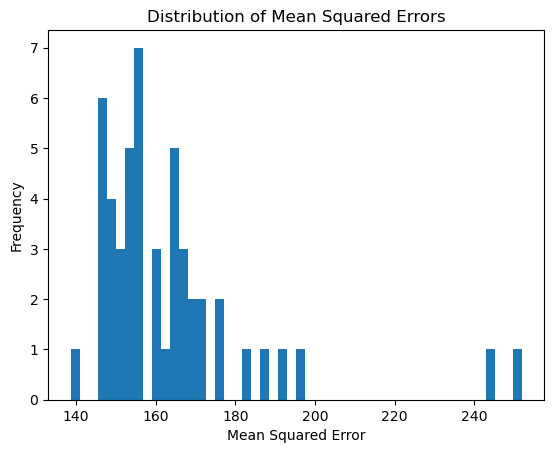

In [15]:
import matplotlib.pyplot as plt

# Plot distribution of mean squared errors
plt.hist(mse_list, bins=50)
plt.xlabel("Mean Squared Error")
plt.ylabel("Frequency")
plt.title("Distribution of Mean Squared Errors")
plt.show()

### Conclusions

By increasing the number of epochs from 50 to 100, we've given the model more time to learn and converge. This is reflected in the lower individual mean squared error values.

The mean of the mean squared errors has decreased, which suggests that the model is better at predicting the concrete strength on average.

The standard deviation of the mean squared errors has also decreased quite a bit, indicating that the model's performance showing that the model's output is less variable across training iterations.

Overall, this output suggests that increasing the number of epochs has improved the model's performance and reduced the variability.